## 42189 Week 7: Exercise 1 (Highway Toll booth problem - DD1 Queue)

$
\lambda(t) = 2.2 + 0.17t − 0.0032t^2 \\
\mu(t) = 1.2 + 0.07t
$

Cumulative arrival and departure functions:

$
A(t) = \int_0^t \lambda(t)dt = \int_0^t (2.2 + 0.17t − 0.0032t^2)dt \\
D(t) = \int_0^t \mu(t)dt = \int_0^t (1.2 + 0.07t)dt
$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as itt

# Discretize time into 65 equally spaced points from t=1 to t=65
t = np.linspace(1,65,65)

# the lambda function (this computes the instantaneous arrival rate at t = 1,2,....65)
lamb = 2.2 + 0.17 * t - 0.0032 * t**2

# the mu function (this computes the instantaneous departure rate at t = 1,2,....65)
mu = 1.2 + 0.07 * t

# Cumulative Arrivals vector 
# The following is a numerical approximation (treating the vehicle arrival rate as contant in each one minute interval)
arriv = list(itt.accumulate(lamb))

# Cumulative Departures vector
depar = list(itt.accumulate(mu))

/home/mbg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Total arrivals after 65 minutes
print(arriv[64])
# A more accurate computation using numerical integration
np.trapz(lamb,t)

207.92199999999994


/tmp/ipykernel_182318/3011405859.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  np.trapz(lamb,t)


np.float64(206.8736)

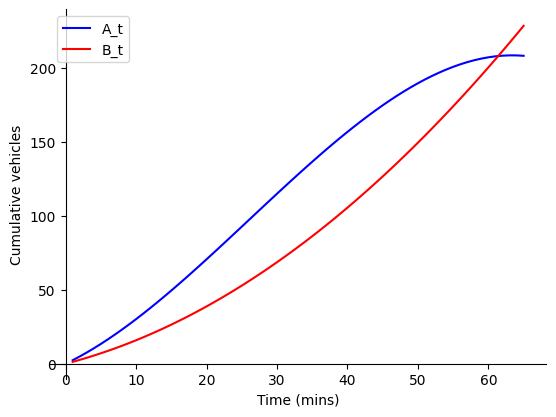

In [ ]:
# Plotting
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (mins)')
plt.ylabel('Cumulative vehicles')
# plot the functions
plt.plot(t,arriv,'b',label='A_t')
plt.plot(t,depar,'r',label='B_t')
plt.legend()
# show the plot
plt.show()

Q1. Compute the maximum queue length

(array([38]),)


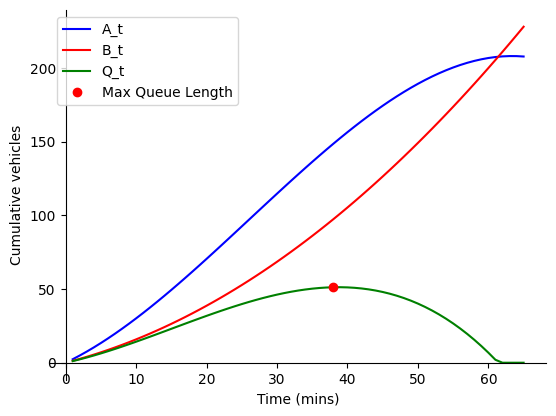

In [9]:
# Calculate queue length at time t by subtracting B from A
queue = np.array(arriv) - np.array(depar)

# Round to 0 for negative values
queue = np.where(queue<0,0,queue)

# Determine longest queue length and find timestamp
max_queue = max(queue)

# Find the time at which the longest queue length occurs
max_queue_time = np.where(queue == max_queue)

# Plotting on top of the previous plot

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (mins)')
plt.ylabel('Cumulative vehicles')
# plot the functions
plt.plot(t,arriv,'b',label='A_t')
plt.plot(t,depar,'r',label='B_t')
plt.legend()
plt.plot(t,queue,'g',label='Q_t')
# Plot the maximum queue length
plt.plot(max_queue_time,max_queue,'ro', label='Max Queue Length')
print(max_queue_time)
plt.legend()
plt.show()


Q2. Compute the total vehicle delay

In [11]:
# Find area between A and B
area = np.trapz(queue,t)

print(area)

1922.2203999999979


/tmp/ipykernel_182318/2885495580.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(queue,t)
